<a href="https://colab.research.google.com/github/selimjang606/selimjang606.github.io/blob/main/KeywordResearch_Textmining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keywords Research - finding keyword topics (Korean):

In [75]:
from google.colab import files
uploaded = files.upload()


Saving circle_1.jpeg to circle_1.jpeg


In [2]:
# Import required libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('keywords.csv')

In [4]:
df.head()

,Keyword
0,1g 물건
1,1살 유나이티드 비즈니스 클래스
2,1세대 생리컵
3,3m 94
4,3m 94마스크


In [5]:
df.shape

(2478, 1)

In [6]:
import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  
    result = hangul.sub('', text)  
    return result


In [7]:
apply_regular_expression(df['Keyword'][0])

' 물건'

In [10]:
from konlpy.tag import Okt
from collections import Counter

okt = Okt()  
nouns = okt.nouns(apply_regular_expression(df['Keyword'][0]))
nouns

['물건']

In [11]:
# Create corpus
corpus = "".join(df['Keyword'].tolist())
corpus

"1g 물건1살 유나이티드 비즈니스 클래스1세대 생리컵3m 943m 94마스크3m 방진마스크 kf94 마스크5시간자도피곤하지않은영양제17차 티백94마스크 비교 3M650달러한국911 응급1107 W Oregon unit3 urbana il1500원커피 체인점2021대한항공시카고왕복비행기값(not provided)admirals clubadobe premiere 19 한국말advil싸게구입airborne 감기약airborne발포비타민 미국apple사 본사 건물asos 드레스 추천asos 쇼핑 목록asos 웨딩avec 시카고azo 유산균azo 크랜베리 월마트bagel sesamebagel sesame seasoning blendbai 음료bai 음료수bai 코코넛워터bai블루베리Banzabanzabanza 파스타barilla 병아리콩파스타BBQ -기프티콘 -기프트콘 -창업bbq rubBEEF BOTTOM ROUND STEAKbeef chuck rib 영양성분beef chuck steak 불고기Bigelow 오가닉 디카페인 녹차caltrain 앱caltrain 후기champaign 레스토랑chick fil a 소스chuck steak boneless carne asadacj 삼계죽Congress Plaza Hotelcongress 시카고Crate BarrelCRATE&BARRELcrate&barrelcu 끼리크림치즈cu 홈런볼 구독curtis orchardCURTIS ORCHARDdansk 포틀랜드DivaCupdivacup menstrual cupeuropa park 주차evan williams 1783EVAN WILLIAMS - 1783 BOURBONevan williams single barreleverthing but the bagel sesameeverything but the bagel seasoningEverything but the bagel sesame seasoning blendeverything the bagelextra 껌Extra 껌 유통기한E

In [12]:
# Apply regular expressions
apply_regular_expression(corpus)

' 물건살 유나이티드 비즈니스 클래스세대 생리컵  마스크 방진마스크  마스크시간자도피곤하지않은영양제차 티백마스크 비교 달러한국 응급     원커피 체인점대한항공시카고왕복비행기값     한국말싸게구입 감기약발포비타민 미국사 본사 건물 드레스 추천 쇼핑 목록 웨딩 시카고 유산균 크랜베리 월마트     음료 음료수 코코넛워터블루베리 파스타 병아리콩파스타 기프티콘 기프트콘 창업       영양성분   불고기 오가닉 디카페인 녹차 앱 후기 레스토랑   소스     삼계죽   시카고  끼리크림치즈 홈런볼 구독   포틀랜드    주차                          껌 껌 유통기한 한국 식빵   메뉴   생리컵 생리컵 컵생리컵생리컵 시각화에스프레소 스타벅스 비교커피맛 스타벅스 여자 직구 허리색 후드집업   직구 여자옷  라인 원피스가 날씬해보이나요ㅇ    삼각티백  드레스  직구     드레스 여행 방진                    공항   버거 공항 르네상스 호텔 공항 인앤아웃 공항 호텔 르네상스 르네상스 르네상스호텔 산타모니카 주차장 요시노야 주차하기 트레이더조 추천공항 인앤아웃공항 인앤아웃햄버거공항 햄버거공항 호텔 조식공항 호텔추천공항에서 인앤아웃롱혼르네상스호텔산타모니카해변왕복비행기값요시노야 핸드크림 스테이크 웨딩드레스의상니트  예방접종 오일 소스    앨런  달고나 통관 통관             얼그레이 월마트아메리칸 블랙퍼스트 귀걸이 배송 중국 후기 시즈닝 요리   가을 같은 야상 익스프레스 재고 추천 추천템 화장품 화장품 후기 후기 미국 후기 수납은 어디거     스테비아  스테비아 제로 칼로리 감미료  스테비아 스테비아 몽크프룻 용도 다운타운  케모마일   ㅇ                     건조과자  추천  커피  화장품   추천     추천  스테비아 할인  시간 딱딱소리 캘리포니아 실속 세트     몽크  몽크프룻  스테비아  스테비아  스테비아 몽크프룻 같은 추천 반품 맛 부작용 부작용 통관물약 가격가디언 오브 포레스트가성비 한우

In [14]:
# Extract Morphemes form Corpus
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)


['물건', '살', '유나이티드', '비즈니스', '클래스', '세대', '생리', '컵', '마스크', '방진', '마스크', '마스크', '시간', '영양', '차', '티백', '마스크', '비교', '달러', '한국', '응급', '커피', '체인점', '대한항공', '시카고', '왕복', '비행기', '값', '한국말', '구입', '감기', '발포', '비타민', '미국사', '본사', '건물', '드레스', '추천', '쇼핑', '목록', '웨딩', '시카고', '유산균', '크랜베리', '월마트', '음료', '음료수', '코코넛', '워터', '블루베리', '파스타', '병아리', '콩', '파스타', '기프티콘', '기프트', '콘', '창업', '영양성분', '불고기', '닉', '디카', '페인', '녹차', '앱', '후기', '레스토랑', '소스', '삼계', '죽', '시카고', '끼리', '크림', '치즈', '홈런', '볼', '구독', '포틀랜드', '주차', '껌', '껌', '유통', '기한', '한국', '식빵', '메뉴', '생리', '컵', '생리', '컵', '컵', '생리', '컵', '생리', '컵', '시각', '에스프레소', '스타벅스', '비교', '커피', '맛', '스타벅스', '여자', '직구', '허리', '색', '후드', '집업', '직구', '여자', '옷', '라인', '원피스', '삼각', '티백', '드레스', '직구', '드레스', '여행', '방진', '공항', '버거', '공항', '르네상스', '호텔', '공항', '인앤아웃', '공항', '호텔', '르네상스', '르네상스', '르네상스', '호텔', '산타모니카', '주차장', '요시노야', '주차', '트', '레이더', '추천', '공항', '인앤아웃', '공항', '인앤아웃', '햄버거', '공항', '햄버거', '공항', '호텔', '조식', '공항', '호텔', '추천', '공항', '인앤아웃', '롱혼', '르네상스',

In [15]:
counter = Counter(nouns)

In [16]:
counter.most_common(10)

[('미국', 391),
 ('팟', 123),
 ('인스턴트', 113),
 ('시카고', 72),
 ('추천', 72),
 ('한국', 71),
 ('잠실', 61),
 ('산호세', 58),
 ('마트', 57),
 ('여자', 53)]

In [18]:
#Delete Stopwords
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)


[('미국', 391),
 ('인스턴트', 113),
 ('시카고', 72),
 ('추천', 72),
 ('한국', 71),
 ('잠실', 61),
 ('산호세', 58),
 ('마트', 57),
 ('여자', 53),
 ('어깨', 53)]

Most Common Keywords in Korean (N of Times Searched)

'USA' (391) > 'Instant' (113)> 'Chicago'  (72) > 'Recommand' (72) > 'Korea' (71) > 'Jamsil' (a district of Seoul) (61) > 'San Jose' (58) > Market (57) > Women (53) > Shoulder (53)

## Keyword Research 2. English Keyword Topics

In [56]:
import re

def apply_regular_expression_eng(text):
    eng = re.compile('[[^a-zA-Z]')
    result = eng.sub('', text) 
    return result

In [57]:
apply_regular_expression_eng(df['Keyword'][0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Possible nested set at position 1
  after removing the cwd from sys.path.


'1 물건'

In [58]:
from konlpy.tag import Okt
from collections import Counter

okt = Okt()  
nouns = okt.nouns(apply_regular_expression_eng(df['Keyword'][0]))
nouns

['물건']

In [59]:
# Create corpus
corpus = "".join(df['Keyword'].tolist())
corpus

"1g 물건1살 유나이티드 비즈니스 클래스1세대 생리컵3m 943m 94마스크3m 방진마스크 kf94 마스크5시간자도피곤하지않은영양제17차 티백94마스크 비교 3M650달러한국911 응급1107 W Oregon unit3 urbana il1500원커피 체인점2021대한항공시카고왕복비행기값(not provided)admirals clubadobe premiere 19 한국말advil싸게구입airborne 감기약airborne발포비타민 미국apple사 본사 건물asos 드레스 추천asos 쇼핑 목록asos 웨딩avec 시카고azo 유산균azo 크랜베리 월마트bagel sesamebagel sesame seasoning blendbai 음료bai 음료수bai 코코넛워터bai블루베리Banzabanzabanza 파스타barilla 병아리콩파스타BBQ -기프티콘 -기프트콘 -창업bbq rubBEEF BOTTOM ROUND STEAKbeef chuck rib 영양성분beef chuck steak 불고기Bigelow 오가닉 디카페인 녹차caltrain 앱caltrain 후기champaign 레스토랑chick fil a 소스chuck steak boneless carne asadacj 삼계죽Congress Plaza Hotelcongress 시카고Crate BarrelCRATE&BARRELcrate&barrelcu 끼리크림치즈cu 홈런볼 구독curtis orchardCURTIS ORCHARDdansk 포틀랜드DivaCupdivacup menstrual cupeuropa park 주차evan williams 1783EVAN WILLIAMS - 1783 BOURBONevan williams single barreleverthing but the bagel sesameeverything but the bagel seasoningEverything but the bagel sesame seasoning blendeverything the bagelextra 껌Extra 껌 유통기한E

In [60]:
# Extract Morphemes form Corpus
nouns = okt.nouns(apply_regular_expression_eng(corpus))
print(nouns)


['물건', '살', '유나이티드', '비즈니스', '클래스', '세대', '생리', '컵', '마스크', '방진', '마스크', '마스크', '차', '티백', '마스크', '비교', '응급', '체인점', '대한항공', '시카고', '왕복', '비행기', '값', '한국말', '구입', '감기', '발포', '비타민', '미국사', '본사', '건물', '드레스', '추천', '쇼핑', '목록', '웨딩', '시카고', '유산균', '크랜베리', '월마트', '음료', '음료수', '코코넛', '워터', '블루베리', '파스타', '병아리', '콩', '파스타', '기프티콘', '기프트', '콘', '창업', '영양성분', '불고기', '닉', '디카', '페인', '녹차', '앱', '후기', '레스토랑', '소스', '삼계', '죽', '시카고', '끼리', '크림', '치즈', '홈런', '볼', '구독', '포틀랜드', '주차', '껌', '껌', '유통', '기한', '한국', '식빵', '메뉴', '생리', '컵', '생리', '컵', '컵', '생리', '컵', '생리', '컵', '시각', '에스프레소', '스타벅스', '비교', '커피', '맛', '스타벅스', '여자', '직구', '허리', '색', '후드', '집업', '직구', '여자', '옷', '라인', '원피스', '삼각', '티백', '드레스', '직구', '드레스', '여행', '방진', '공항', '버거', '공항', '르네상스', '호텔', '공항', '인앤아웃', '공항', '호텔', '르네상스', '르네상스', '르네상스', '호텔', '산타모니카', '주차장', '요시노야', '주차', '트', '레이더', '추천', '공항', '인앤아웃', '공항', '인앤아웃', '햄버거', '공항', '햄버거', '공항', '호텔', '조식', '공항', '호텔', '추천', '공항', '인앤아웃', '롱혼', '르네상스', '호텔', '산타모니카', '해변', '왕복', '비

In [21]:
#Delete Stopwords from an external dictionary 
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()


In [42]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [76]:
text = open('keywords.csv').read()
circle = np.array(Image.open('circle_1.jpeg'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [46]:
import nltk
nltk.download('stopwords')

print('The number of stopwords:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:40])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
The number of stopwords: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this']


In [47]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [74]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(example)

result = []
for token in word_tokens: 
    if token not in stop_words: 
        result.append(token) 

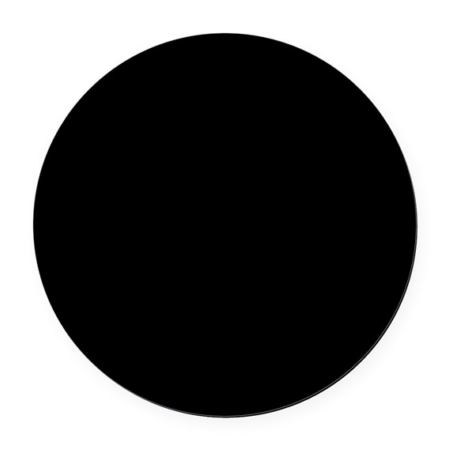

In [77]:
plt.figure(figsize=(8,8))
plt.imshow(circle, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [62]:
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [78]:
text = open('keywords.csv').read()
circle = np.array(Image.open('circle_1.jpeg'))

stopwords = set(STOPWORDS)
stopwords.add("said")
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wc = WordCloud(font_path = fontpath, background_color='white', max_words=2000, mask=circle,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'미국': 1.0,
 '인스턴트팟': 0.3463203463203463,
 '시카고': 0.23809523809523808,
 '산호세': 0.22943722943722944,
 '추천': 0.20346320346320346,
 '가격': 0.12987012987012986,
 '저탄고지': 0.12987012987012986,
 '잠실새내': 0.12554112554112554,
 '후기': 0.12121212121212122,
 '스테비아': 0.12121212121212122,
 '맛집': 0.12121212121212122,
 '미국 마트': 0.11688311688311688,
 '트레이더조': 0.11255411255411256,
 '미국에서': 0.10822510822510822,
 '노브랜드': 0.1038961038961039,
 '트레이더스': 0.1038961038961039,
 '월마트': 0.09956709956709957,
 '샌프란시스코': 0.09523809523809523,
 '한국에서': 0.08658008658008658,
 '키토': 0.08225108225108226,
 '키토제닉': 0.08225108225108226,
 '영양제': 0.07792207792207792,
 '전도연': 0.07792207792207792,
 'trader joe': 0.07792207792207792,
 '어깨 넓은': 0.07792207792207792,
 '요리': 0.0735930735930736,
 '혼밥': 0.0735930735930736,
 '코스트코': 0.0735930735930736,
 '호텔': 0.06926406926406926,
 '다이어트': 0.06926406926406926,
 '메뉴': 0.06493506493506493,
 '에리스리톨': 0.06493506493506493,
 '포텐시에이터': 0.06493506493506493,
 '일리노이': 0.06493506493506493,
 '인스턴트': 0.

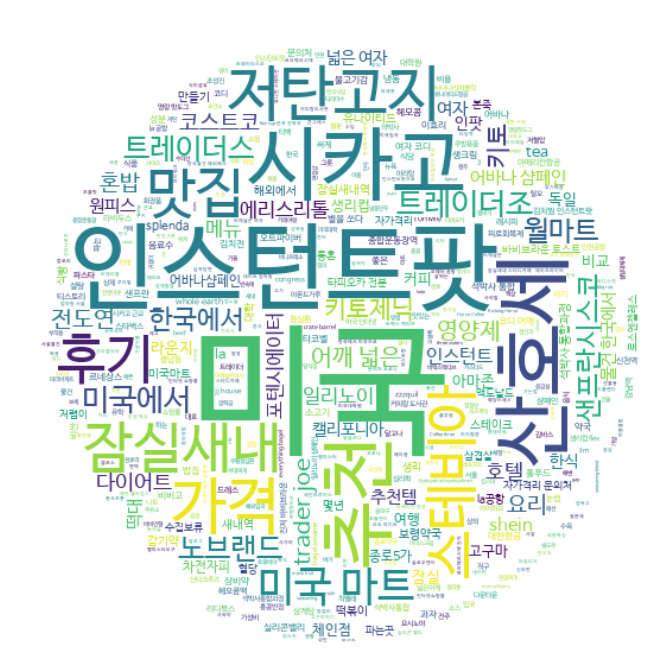

In [79]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()